In [1]:
import numpy as np
import os.path 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



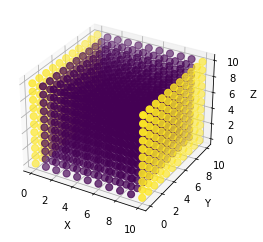

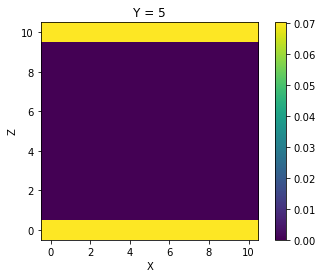

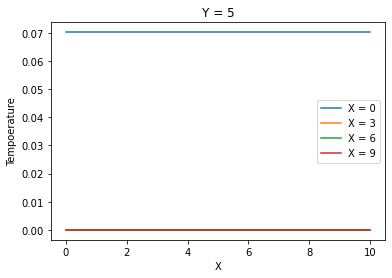

In [2]:
save_path = '/home/links/hm556/DCoding/DGitLab/DProject/outputs'

name_of_file = 'TempDis'

completeName = os.path.join(save_path, name_of_file+".dat")         

# Dimensions of the matrix
# nx, ny, nz = 77,77,77#11*22, 11*22, 11*22 # Adjust these dimensions based on your actual data
# nx, ny, nz = 33,33,33
nx,ny,nz=11,11,11
# nx,ny,nz=55,55,55
# Read the file, remove the first element, and reshape each line into a matrix
with open(completeName, 'r') as file:
    lines = [list(map(float, line.split())) for line in file]

# Convert the list of lists into a NumPy array
array_from_file = np.array(lines)
# print(array_from_file)
# Reshape each line into a 3D matrix
reshaped_matrices = array_from_file.reshape(( nx, ny, nz))
# x=np.linspace(1,nx,nx)
# plt.plot(x,lines[0])
# print(lines[0])
# print(reshaped_matrices)
# # Print the reshaped matrices
# for i, matrix in enumerate(reshaped_matrices):
#     print(f"Matrix {i + 1}:\n{matrix}\n")

def plot_3d_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = np.nonzero(matrix)

    ax.scatter(x, y, z, c=matrix[x, y, z], cmap='viridis', s=50)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
plot_3d_matrix(reshaped_matrices)


def plot_2d_matrix(matrix, axis):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    if axis == 'x':
        ax.set_title("YZ Plane")
        ax.set_xlabel('Y')
        ax.set_ylabel('Z')
        slice_matrix = np.sum(matrix, axis=0)
    elif axis == 'y':
        ax.set_title("XZ Plane")
        ax.set_xlabel('X')
        ax.set_ylabel('Z')
        slice_matrix = np.sum(matrix, axis=1)
    elif axis == 'z':
        ax.set_title("XY Plane")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        slice_matrix = np.sum(matrix, axis=2)

    im = ax.imshow(slice_matrix, cmap='viridis')
    ax.invert_yaxis()
    plt.colorbar(im, ax=ax)
    plt.show()
# plot_2d_matrix(reshaped_matrices, 'z')


def plot_2d_slice(matrix, axis, index):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    if axis == 'x':
        slice_matrix = matrix[index, :, :]
        ax.set_title(f"X = {index}")
        ax.set_xlabel('Y')
        ax.set_ylabel('Z')
    elif axis == 'y':
        slice_matrix = matrix[:, index, :]
        ax.set_title(f"Y = {index}")
        ax.set_xlabel('X')
        ax.set_ylabel('Z')
    elif axis == 'z':
        slice_matrix = matrix[:, :, index]
        ax.set_title(f"Z = {index}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
    im = ax.imshow(slice_matrix, cmap='viridis')
    ax.invert_yaxis()
    plt.colorbar(im, ax=ax)
    plt.show()

# Plot a 2D slice along the x-axis at index 5
plot_2d_slice(reshaped_matrices, 'y', int(nx/2))


def plot_line_graph(matrix, axis, index):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    if axis == 'x':
        slice_matrix = matrix[index, :, :]
        ax.set_title(f"X = {index}")
        ax.set_xlabel('Z')
        ax.set_ylabel('Temperature')
        x = np.arange(slice_matrix.shape[1])
        for i in range(0,slice_matrix.shape[0],int(slice_matrix.shape[0]/3)):
            ax.plot(x, slice_matrix[i, :], label=f"Z = {i}")
        ax.plot(x, slice_matrix[int(nx/2), :], label=f"Z = {int(nx/2)}")
    elif axis == 'y':
        slice_matrix = matrix[:, index, :]
        ax.set_title(f"Y = {index}")
        ax.set_xlabel('X')
        ax.set_ylabel('Tempoerature')
        x = np.arange(slice_matrix.shape[1])
        for i in range(0,slice_matrix.shape[0],int(slice_matrix.shape[0]/3)):
            ax.plot(x, slice_matrix[i, :], label=f"X = {i}")
    elif axis == 'z':
        slice_matrix = matrix[:, :, index]
        ax.set_title(f"Z = {index}")
        ax.set_xlabel('Y')
        ax.set_ylabel('Temperature')
        x = np.arange(slice_matrix.shape[1])
        for i in range(0,slice_matrix.shape[0],int((slice_matrix.shape[0])/3)):
            ax.plot(x, slice_matrix[i, :], label=f"Y = {i}")
    ax.legend()
    plt.show()



plot_line_graph(reshaped_matrices, 'y', int(nx/2)) 

[0.006, 0.012, 0.007, 2.699, 31.33, 168.6, 651.6]


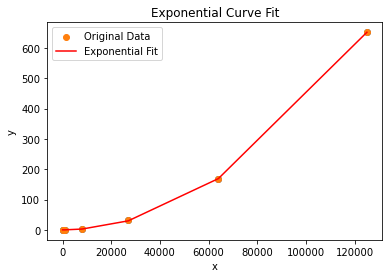

Fitted Parameters: a=3.4513147393904595e-08, b=2.0160771438061356, c=0.26749429426200977
0.49881141340170154


In [26]:
t1 = [0.006]
t5 = [0.012]
t10 =[0.007]
t20 =[2.699]
t30 = [31.33]
t40 =[168.6]
t50 =[651.6]
s=[1, 5**3, 10**3, 20**3, 30**3, 40**3, 50**3]
t=[sum(t1)/len(t1), sum(t5)/len(t5), sum(t10)/len(t10), sum(t20)/len(t20), sum(t30)/len(t30), sum(t40)/len(t50), sum(t50)/len(t50)]
plt.scatter(s,t)
print(t)
# Define the exponential function to fit
def exponential_function(x, a, b, c):
    return a * x**b + c

# Generate example data
x_data = np.array([1, 5**3, 10**3, 20**3, 30**3, 40**3, 50**3])
y_data = np.array([sum(t1)/len(t1), sum(t5)/len(t5), sum(t10)/len(t10), sum(t20)/len(t20), sum(t30)/len(t30), sum(t40)/len(t50), sum(t50)/len(t50)])

# Fit the exponential curve
params, covariance = curve_fit(exponential_function, x_data, y_data, p0=[1, 0, 1], maxfev=5000)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate y values for the fitted curve
y_fit = exponential_function(x_data, a_fit, b_fit, c_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, y_fit, label='Exponential Fit', color='red')
plt.legend()
#plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve Fit')
plt.show()

# Print the fitted parameters
print(f"Fitted Parameters: a={a_fit}, b={b_fit}, c={c_fit}")
print(exponential_function(100**3, a_fit, b_fit, c_fit)/(60*60*24))


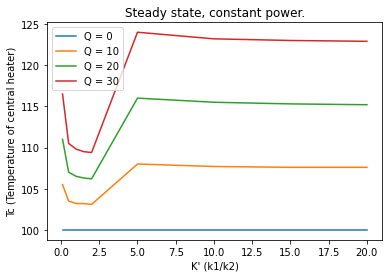

In [13]:
TcQ1 = [100, 100, 100, 100, 100, 100, 100, 100, 100]
kp = [0.1, 0.5, 1, 1.5, 2, 5, 10, 15, 20]
TcQ2 = [105.5, 103.5, 103.2, 103.2, 103.1, 108, 107.7, 107.6, 107.6]
TcQ3 = [111, 107, 106.5, 106.3, 106.2, 116, 115.5, 115.3, 115.2]
TcQ4 = [116.5, 110.5, 109.8, 109.5, 109.4, 124, 123.2, 123, 122.9]


plt.title('Steady state, constant power, (K boundary = 1).')
plt.xlabel('K\' (k1/k2)')
plt.ylabel('Tc (Temperature of central heater)')
plt.plot(kp, TcQ1, label='Q = 0')
plt.plot(kp, TcQ2, label='Q = 10')
plt.plot(kp, TcQ3, label='Q = 20')
plt.plot(kp, TcQ4, label='Q = 30')
plt.legend()

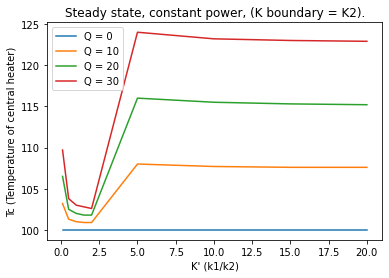

In [16]:
TcQ1 = [100, 100, 100, 100, 100, 100, 100, 100, 100]
kp = [0.1, 0.5, 1, 1.5, 2, 5, 10, 15, 20]
TcQ2 = [103.2, 101.3, 101, 100.9, 100.9, 108, 107.7, 107.6, 107.6]
TcQ3 = [106.5, 102.5, 102, 101.8, 101.8, 116, 115.5, 115.3, 115.2]
TcQ4 = [109.7, 103.8, 103, 102.8, 102.6, 124, 123.2, 123, 122.9]


plt.title('Steady state, constant power, (K boundary = K2).')
plt.xlabel('K\' (k1/k2)')
plt.ylabel('Tc (Temperature of central heater)')
plt.plot(kp, TcQ1, label='Q = 0')
plt.plot(kp, TcQ2, label='Q = 10')
plt.plot(kp, TcQ3, label='Q = 20')
plt.plot(kp, TcQ4, label='Q = 30')
plt.legend()

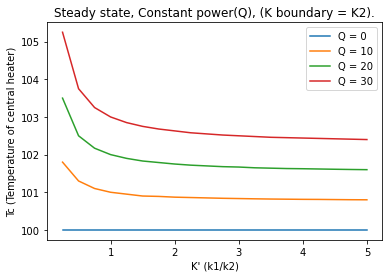

In [65]:
TcQ1 = [ 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
kp = [ 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]
TcQ2 = [ 101.8, 101.3, 101.1, 101, 100.95, 100.9, 100.89, 100.87, 100.86, 100.85, 100.84, 100.833, 100.826, 100.82, 100.816, 100.812, 100.81, 100.806, 100.802, 100.8]
TcQ3 = [103.5, 102.5, 102.17, 102, 101.9, 101.83,  101.79, 101.75, 101.72, 101.7, 101.68, 101.67, 101.65, 101.64, 101.63, 101.625, 101.618, 101.611, 101.605, 101.60]
TcQ4 = [ 105.25, 103.75, 103.25, 103.00, 102.85, 102.75, 102.68, 102.63, 102.58, 102.55, 102.52, 102.50, 102.48, 102.46, 102.45, 102.44, 102.43, 102.42, 102.41, 102.40]


plt.title('Steady state, Constant power(Q), (K boundary = K2).')
plt.xlabel('K\' (k1/k2)')
plt.ylabel('Tc (Temperature of central heater)')
plt.plot(kp, TcQ1, label='Q = 0')
plt.plot(kp, TcQ2, label='Q = 10')
plt.plot(kp, TcQ3, label='Q = 20')
plt.plot(kp, TcQ4, label='Q = 30')
plt.legend()

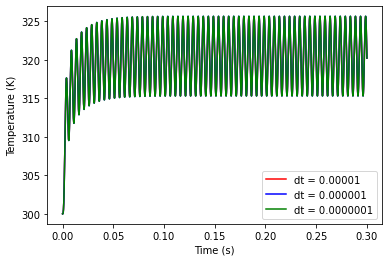

In [87]:
data4 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/Old/output_Fourier(dt4)_freq_100.00.txt')
time4 = np.linspace(0, 0.00001*30000, 30000)
data5 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/Old/output_Fourier(dt5)_freq_100.00.txt')
time5 = np.arange(0, 0.000001*300000, 0.000001)
data6 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/Old/output_Fourier(dt6)_freq_100.00.txt')
time6 = np.arange(0, 0.0000001*3000000, 0.0000001)

num_rows4, num_cols4 = data4.shape
num_rows5, num_cols5 = data5.shape
num_rows6, num_cols6 = data6.shape
T64=[]
for i in range(num_rows4):
    T64.append(data4[i,5])
plt.plot(time4, T64, label='dt = 0.00001', color='red')
T65=[]
for i in range(num_rows5):
    T65.append(data5[i,5])
plt.plot(time5, T65, label='dt = 0.000001', color='blue')
T66=[]
for i in range(num_rows6):
    T66.append(data6[i,5])
plt.plot(time6, T66, label='dt = 0.0000001', color='green')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.show()


Text(0, 0.5, 'Temperature (K)')

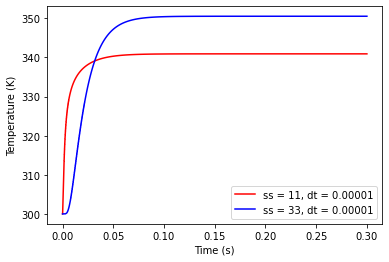

In [34]:
data611 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/output_FourierSystem11Const_freq_100.00.txt')
time = np.linspace(0, 0.00001*30000, 30000)
data1733 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/output_FourierSystem33Const_freq_100.00.txt')

num_rows611, num_cols611 = data611.shape
num_rows1733, num_cols1733 = data1733.shape
T611=[]
for i in range(num_rows611):
    T611.append(data611[i,5])
plt.plot(time, T611, label='ss = 11, dt = 0.00001', color='red')
T1733=[]
for i in range(num_rows1733):
    T1733.append(data1733[i,16])
plt.plot(time, T1733, label='ss = 33, dt = 0.00001', color='blue')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

432.589840814892


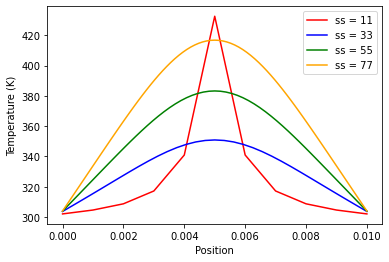

In [282]:
data611  = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/output_11Heated_freq_1000.00.txt')
data1733 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/output_33Heated_freq_1000.00.txt')
data2855 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/output_55Heated_freq_1000.00.txt')
data3977 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/output_77Heated_freq_1000.00.txt')
num_rows611, num_cols611 = data611.shape
num_rows1733, num_cols1733 = data1733.shape
num_rows2855, num_cols2855 = data2855.shape
num_rows3977, num_cols3977 = data3977.shape
T611=[]
for i in range(2,num_rows611):
    T611.append(data611[i,5])
    # plt.plot(data611[i,1:], label='ss = 11', color='red')
T1733=[]
for i in range(2,num_rows1733):
    T1733.append(data1733[i,16])
    # plt.plot(data1733[i,1:], label='ss = 33', color='blue')
T2855=[]
for i in range(2,num_rows2855):
    T2855.append(data2855[i,27])
    # plt.plot(data2855[i,1:], label='ss = 55', color='green')
T3977=[]
for i in range(2,num_rows3977):
    T3977.append(data3977[i,38])
    # plt.plot(data3977[i,1:], label='ss = 77', color='orange')
x11 = np.linspace(0, 0.01, 11)
x33 = np.linspace(0, 0.01, 33)
x55 = np.linspace(0, 0.01, 55)
x77 = np.linspace(0, 0.01, 77)
plt.plot(x11, data611[2,1:], label='ss = 11', color='red')
plt.plot(x33, data1733[2,1:], label='ss = 33', color='blue')
plt.plot(x55, data2855[2,1:], label='ss = 55', color='green')
plt.plot(x77, data3977[2,1:], label='ss = 77', color='orange')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Temperature (K)')
print(max(data611[2,1:]))

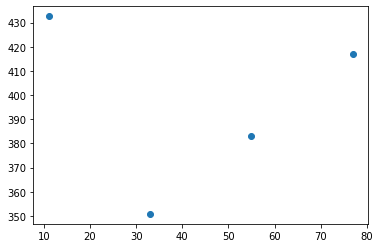

In [85]:
maxTemp = [432.5898, 350.874, 383.245,416.795]
Size = [11,33, 55, 77]
plt.scatter(Size, maxTemp)


KeyboardInterrupt: 

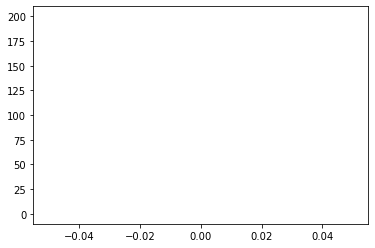

In [16]:
# Read the file and extract the data
data = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/Power.txt')

# Get the number of rows and columns in the data
num_rows, num_cols = data.shape
time = np.arange(0, 0.00001*50000, 0.00001)
# Plot each line of the data
for i in range(num_rows):

    plt.plot(data[i, 1:], label=f'Line {i+1}')
    
# Add labels and legend
plt.xlabel('Postion in system through a plane')
plt.ylabel('Temperature')
# plt.legend()

# Show the plot
plt.show()


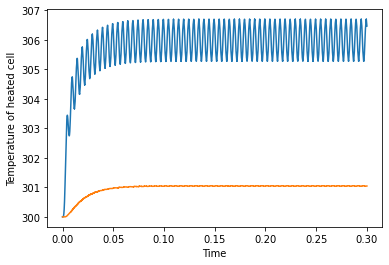

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Read the file and extract the data
data = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/Temperature.txt')

num_rows, num_cols = data.shape

T6 = []
T9 = []

time = np.arange(0, 0.00000001*30000000, 0.00000001)    
# Plot each line of the data
for i in range(num_rows):
    T6.append(data[i, 6])
    T9.append(data[i, 9])
# Add labels and legend
# plt.xlabel('Postion in system through a plane')
# plt.ylabel('Temperature')
# plt.legend()

# Show the plot
plt.show()
plt.xlabel('Time')
plt.ylabel('Temperature of heated cell')
plt.plot(time,T6)
plt.plot(time,T9)

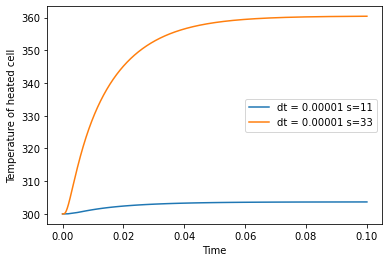

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Read the file and extract the data
data = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/HeatedCellDifMatOLD/Temperature(dt4)11.txt')
data2 = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/HeatedCellDifMatOLD/Temperature(dt4)33.txt')
# Get the number of rows and columns in the data
num_rows, num_cols = data.shape
num_rows2, num_cols2 = data2.shape
# num_rows3, num_cols3 = data3.shape
T61 = []
T91 = []
T62 = []
T92 = []
T63 = []
T93 = []
time1 = np.arange(0, 0.00001*10000, 0.00001)
time2 = np.arange(0, 0.00001*10000, 0.00001)
# time2 = np.arange(0, 0.000001*100000, 0.000001)
# time3 = np.arange(0, 0.0000001*1000000, 0.0000001)      
# Plot each line of the data
for i in range(num_rows):
    T61.append(data[i, 9])
    # T9.append(data[i, 9])
for i in range(num_rows2):
    T62.append(data2[i, 25])
    # T9.append(data[i, 9])
# for i in range(num_rows3):
#     T63.append(data3[i, 17])
    # T9.append(data[i, 9])
# Add labels and legend
# plt.xlabel('Postion in system through a plane')
# plt.ylabel('Temperature')
# plt.legend()

# Show the plot
plt.show()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.plot(time1,T61, label='dt = 0.00001 s=11')
plt.plot(time2,T62, label='dt = 0.00001 s=33')
# plt.plot(time3,T63, label='dt = 0.0000001')
plt.legend()
# plt.plot(time,T9)


In [15]:
time=  list(time)
print(len(time))
s=int(len(time)*2/5)
print(len(time[s:]))
# print(time.index(0.2))
print(max(T6))
print(min(T6[s:]))
print('Range = '+str(max(T6[s:])-min(T6[s:])))
print((sum(T6[s:]))/len(T6[s:]))
# print(T6.index(max(T6)))
# print(time[T6.index(max(T6))])
# # print(time.index(0.2))
# print(sum(T6[s:])/len(T6[s:]))
timedis =[]

# for i in range(20000, 30000): 
#     if abs(T6[i]-max(T6)) < 0.00001:
#         timedis.append(time[i])
#         print(time[i])



30000000
18000000
306.6979110949275
305.2726519196359
Range = 1.4252591752916146
305.9860648152911


In [17]:
time = list(time)
print(max(T9))
print(min(T9[s:]))
print('Range = ' + str(max(T9[s:])-min(T9[s:])))
print((sum(T9[s:]))/len(T9[s:]))
# print(T9.index(max(T9)))
# print(time[T9.index(max(T9))])
# # print(time.index(0.2))
# print(sum(T9[s:])/len(T9[s:]))
timedis =[]

301.0537372683183
301.0432654128772
Range = 0.010471855441096523
301.04884409231585


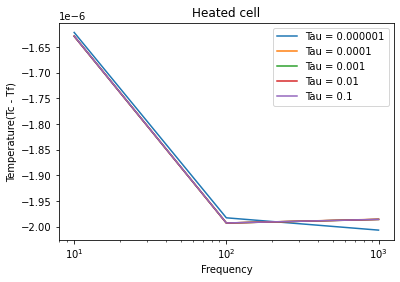

In [77]:
Tcatav1 = [308.7808830526585, 308.7808826883238,308.7808826952866]
Tcatav2 = [308.78088305272973, 308.7808826884121, 308.7808826954131]#, 307.90695978049314]
Tcatav3 = [308.7808830526527, 308.78088268832187, 308.78088269527706]#, 307.90696133931056]
Tcatav4 = [308.7808830526436, 308.78088268831294, 308.7808826956557]
Tcatav6 = [308.78088305997437, 308.78088269844636, 308.78088267445054]
f = [10, 100, 1_000]#, 1_000_000]
Tf = 308.78088468117710
dT1 = [(i - Tf) for i in Tcatav1]
dT2 = [(i - Tf) for i in Tcatav2]
dT3 = [(i - Tf) for i in Tcatav3]
dT4 = [(i - Tf) for i in Tcatav4]
dT6 = [(i - Tf) for i in Tcatav6]
plt.plot(f, dT6, label='Tau = 0.000001')
plt.plot(f, dT4, label='Tau = 0.0001')
plt.plot(f, dT3, label='Tau = 0.001')
plt.plot(f, dT1, label='Tau = 0.01')
plt.plot(f, dT2, label='Tau = 0.1')
plt.xlabel('Frequency')
plt.ylabel('Temperature(Tc - Tf)')
plt.title('Heated cell')
plt.legend()
plt.xscale('log')   

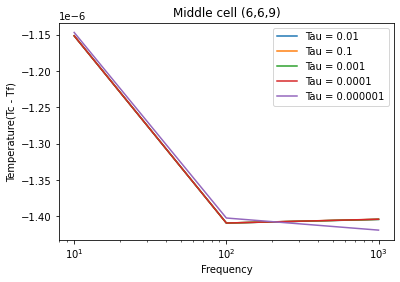

In [76]:
Tcatav1 = [305.34728493353725, 305.3472846759153,305.34728468087036]
Tcatav2 = [305.3472849335894, 305.3472846759779, 305.3472846810348]
Tcatav3 = [305.3472849335391, 305.3472846759125, 305.347284680971]
Tcatav4 = [305.34728493352685, 305.34728467590156, 305.34728468116015]
Tcatav6 = [305.34728493815345, 305.34728468281605, 305.34728466615996]
f = [10, 100, 1_000]
Tf = 305.3472860851
dT1 = [i - Tf for i in Tcatav1]
dT2 = [i - Tf for i in Tcatav2]
dT3 = [i - Tf for i in Tcatav3]
dT4 = [i - Tf for i in Tcatav4]
dT6 = [i - Tf for i in Tcatav6]
plt.plot(f, dT1, label='Tau = 0.01')
plt.plot(f, dT2, label='Tau = 0.1')
plt.plot(f, dT3, label='Tau = 0.001')
plt.plot(f, dT4, label='Tau = 0.0001')
plt.plot(f, dT6, label='Tau = 0.000001')
plt.xlabel('Frequency')
plt.ylabel('Temperature(Tc - Tf)')
plt.title('Middle cell (6,6,9)')
plt.legend()
plt.xscale('log')   

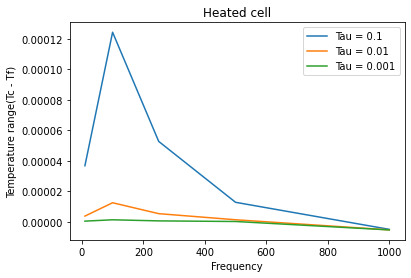

In [99]:
import matplotlib.pyplot as plt

Tcatrn1 = [10.227476842205135, 1.148002626449511, 0.2722335564911873 ,0.049616734194785295, 0.0009492419326875279]
Tcatrn2 = [10.227443773321056, 1.147890672297251, 0.2721861187801551 ,0.04960527315682839, 0.0009489060873875133]
Tcatrn3 = [10.22744046641725,  1.1478794762994653, 0.2721813726915343 , 0.0496041356274759, 0.0009488722067203526]
Tcatrn6 = [0.000954274377420461]

fr = [10.227440098982981, 1.1478782322932943, 0.2721808453281369, 0.049604009215897804, 0.000954274377420461]
f = [10, 100, 250, 500, 1_000]

drT1 = [x - y for x, y in zip(Tcatrn1, fr)]
drT2 = [x - y for x, y in zip(Tcatrn2, fr)]
drT3 = [x - y for x, y in zip(Tcatrn3, fr)]
plt.title('Heated cell')
plt.plot(f, drT1, label='Tau = 0.1')
plt.plot(f, drT2, label='Tau = 0.01')
plt.plot(f, drT3, label='Tau = 0.001')
plt.xlabel('Frequency')
plt.ylabel('Temperature range(Tc - Tf)')
plt.legend()
plt.show()


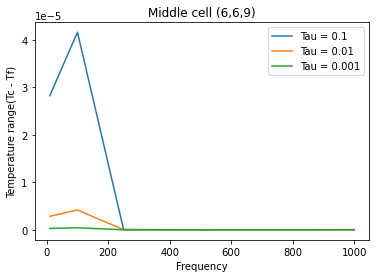

In [101]:
import matplotlib.pyplot as plt

Tcatrn1 = [5.615874542347285, 0.3139159208258775, 0.0014411735147632498, 0.0011497231120642937, 6.700481367261091e-05]
Tcatrn2 = [5.615849146036965, 0.3138785053671995, 0.0014411190206260471, 0.0011497525810000297, 6.698710876662517e-05]
Tcatrn3 = [5.6158466064013055, 0.31387476358662525, 0.0014411135816772003, 0.0011497555640858081, 6.698535918303605e-05]
Tcatrn6 = [6.725593408418717e-05]
fr = [5.61584632421949, 0.31387434783050594, 0.001441112978000092, 0.0011497559003714741, 6.698520934378394e-05]

drT1 = [x - y for x, y in zip(Tcatrn1, fr)]
drT2 = [x - y for x, y in zip(Tcatrn2, fr)]
drT3 = [x - y for x, y in zip(Tcatrn3, fr)]
plt.title('Middle cell (6,6,9)')
plt.plot(f, drT1, label='Tau = 0.1')
plt.plot(f, drT2, label='Tau = 0.01')
plt.plot(f, drT3, label='Tau = 0.001')
plt.xlabel('Frequency')
plt.ylabel('Temperature range(Tc - Tf)')
plt.legend()
plt.show()


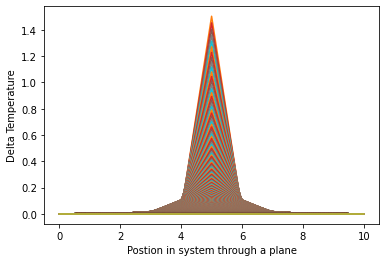

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Read the file and extract the data
data = np.loadtxt('/home/links/hm556/DCoding/DGitLab/DProject/outputs/DTemperature.txt', skiprows=1)

# Get the number of rows and columns in the data
num_rows, num_cols = data.shape

# Plot each line of the data
for i in range(num_rows):
    plt.plot(data[i, 1:], label=f'Line {i+1}')

# Add labels and legend
plt.xlabel('Postion in system through a plane')
plt.ylabel('Delta Temperature')
# plt.legend()


# Show the plot
plt.show()

In [121]:
power = 100
frequency = 1_000
dt = 1e-6
timestep = np.arange(0, 0.01, dt)
print(timestep)
Q=power*(np.sin(timestep*2*np.pi*frequency)**2)
# plt.plot(timestep, Q)
print(sum(Q))
QI = []
timestep=list(timestep)
for i in timestep:
        a = 2*np.pi*frequency*(i)
        b = 2*np.pi*frequency*(i+dt)
        QI.append(0.5*((b-a)-np.sin(b)*np.cos(b)+np.sin(a)*np.cos(a)))
    # if np.sin(i*2*np.pi*frequency) >= 0:
    #     QI.append(power*(-1*np.cos((i+dt)*2*np.pi*frequency)+np.cos((i)*2*np.pi*frequency)))
    # else: 
    #     QI.append(power*(np.cos((i+dt)*2*np.pi*frequency)-np.cos((i)*2*np.pi*frequency)))
print(sum(QI))

# plt.plot(timestep, QI)


[0.000e+00 1.000e-06 2.000e-06 ... 9.997e-03 9.998e-03 9.999e-03]
500000.0000000001
31.415926535895313


In [96]:
a = 2*np.pi*frequency*0
b = 2*np.pi*frequency*0.01
(2/np.pi)*((b-a)+((-1*np.cos(b)*np.sign(np.sin(b)))+(np.cos(a)*np.sign(np.sin(a)))))

40000.63661977237